# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [24]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [23]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/sample_data/porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [25]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [26]:
# Convert categorical features to category type
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [27]:
# Calculate time taken in minutes
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

# Now calculate delivery time
df['delivery_time'] = df['actual_delivery_time'] - df['created_at']
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance   delivery_time  
0                      21.0     34.44 0 days 00:47:00  
1                       2.0     27.60 0 days 00:44:00  
2                      18.0     11.56 0 days 00:55:00  
3                       8.0     31.80 0 days 00:59:00  
4                       7.0      8.20 0 days 00:46:00

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [28]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

df['created_hour'] = df['created_at'].dt.hour

df['created_dayofweek'] = df['created_at'].dt.dayofweek

df['created_dayname'] = df['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['created_at'].dt.dayofweek >= 5

# Convert to categorical type
df['isWeekend'] = df['isWeekend'].astype('category')

df.head()



market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance   delivery_time  created_hour  \
0                      21.0     34.44 0 days 00:47:00            22   
1                       2.0     27.60 0 days 00:44:00            21   
2                      18.0     11.56 0 days 00:55:00             0   
3                       8.0     31.80 0 days 00:59:00             3   
4                       7.0      8.20 0 days 00:46:00             2   

   created_dayofweek created_dayname isWeekend  
0                  4          Friday     False  
1                  1         Tuesday     False  
2                  0          Monday     False  
3                  3        Thursday     False  
4                  1         Tuesday     False

In [34]:
# Drop unnecessary columns
df.columns
#df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)
df.head()

market_id  store_primary_category  order_protocol  total_items  subtotal  \
0        1.0                       4             1.0            4      3441   
1        2.0                      46             2.0            1      1900   
2        2.0                      36             3.0            4      4771   
3        1.0                      38             1.0            1      1525   
4        1.0                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance   delivery_time  \
0                14.0                      21.0     34.44 0 days 00:47:00   
1                 2.0                       2.0     27.60 0 days 00:44:00   
2                 6.0                      18.0     11.56 0 days 00:55:00   
3                 6.0                       8.0     31.80 0 days 00:59:00   
4                 5.0                       7.0      8.20 0 days 00:46:00   

   created_hour  created_dayofweek created_dayname isWeekend  
0            22                  4          Friday     False  
1            21                  1         Tuesday     False  
2             0                  0          Monday     False  
3             3                  3        Thursday     False  
4             2                  1         Tuesday     False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [37]:
# Define target variable (y) and features (X)

#Define target variable (y)
y = df['delivery_time']

# Define features
X = df
print(X.columns)
#print(y.columns)

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time', 'created_hour',
       'created_dayofweek', 'created_dayname', 'isWeekend'],
      dtype='object')


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [38]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# 70% training and 30% testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42  # for reproducibility
)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [30]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Identify numerical columns (excluding datetime and categorical)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_cols = df.select_dtypes(include='category').columns.tolist()

# Print ists
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: []


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

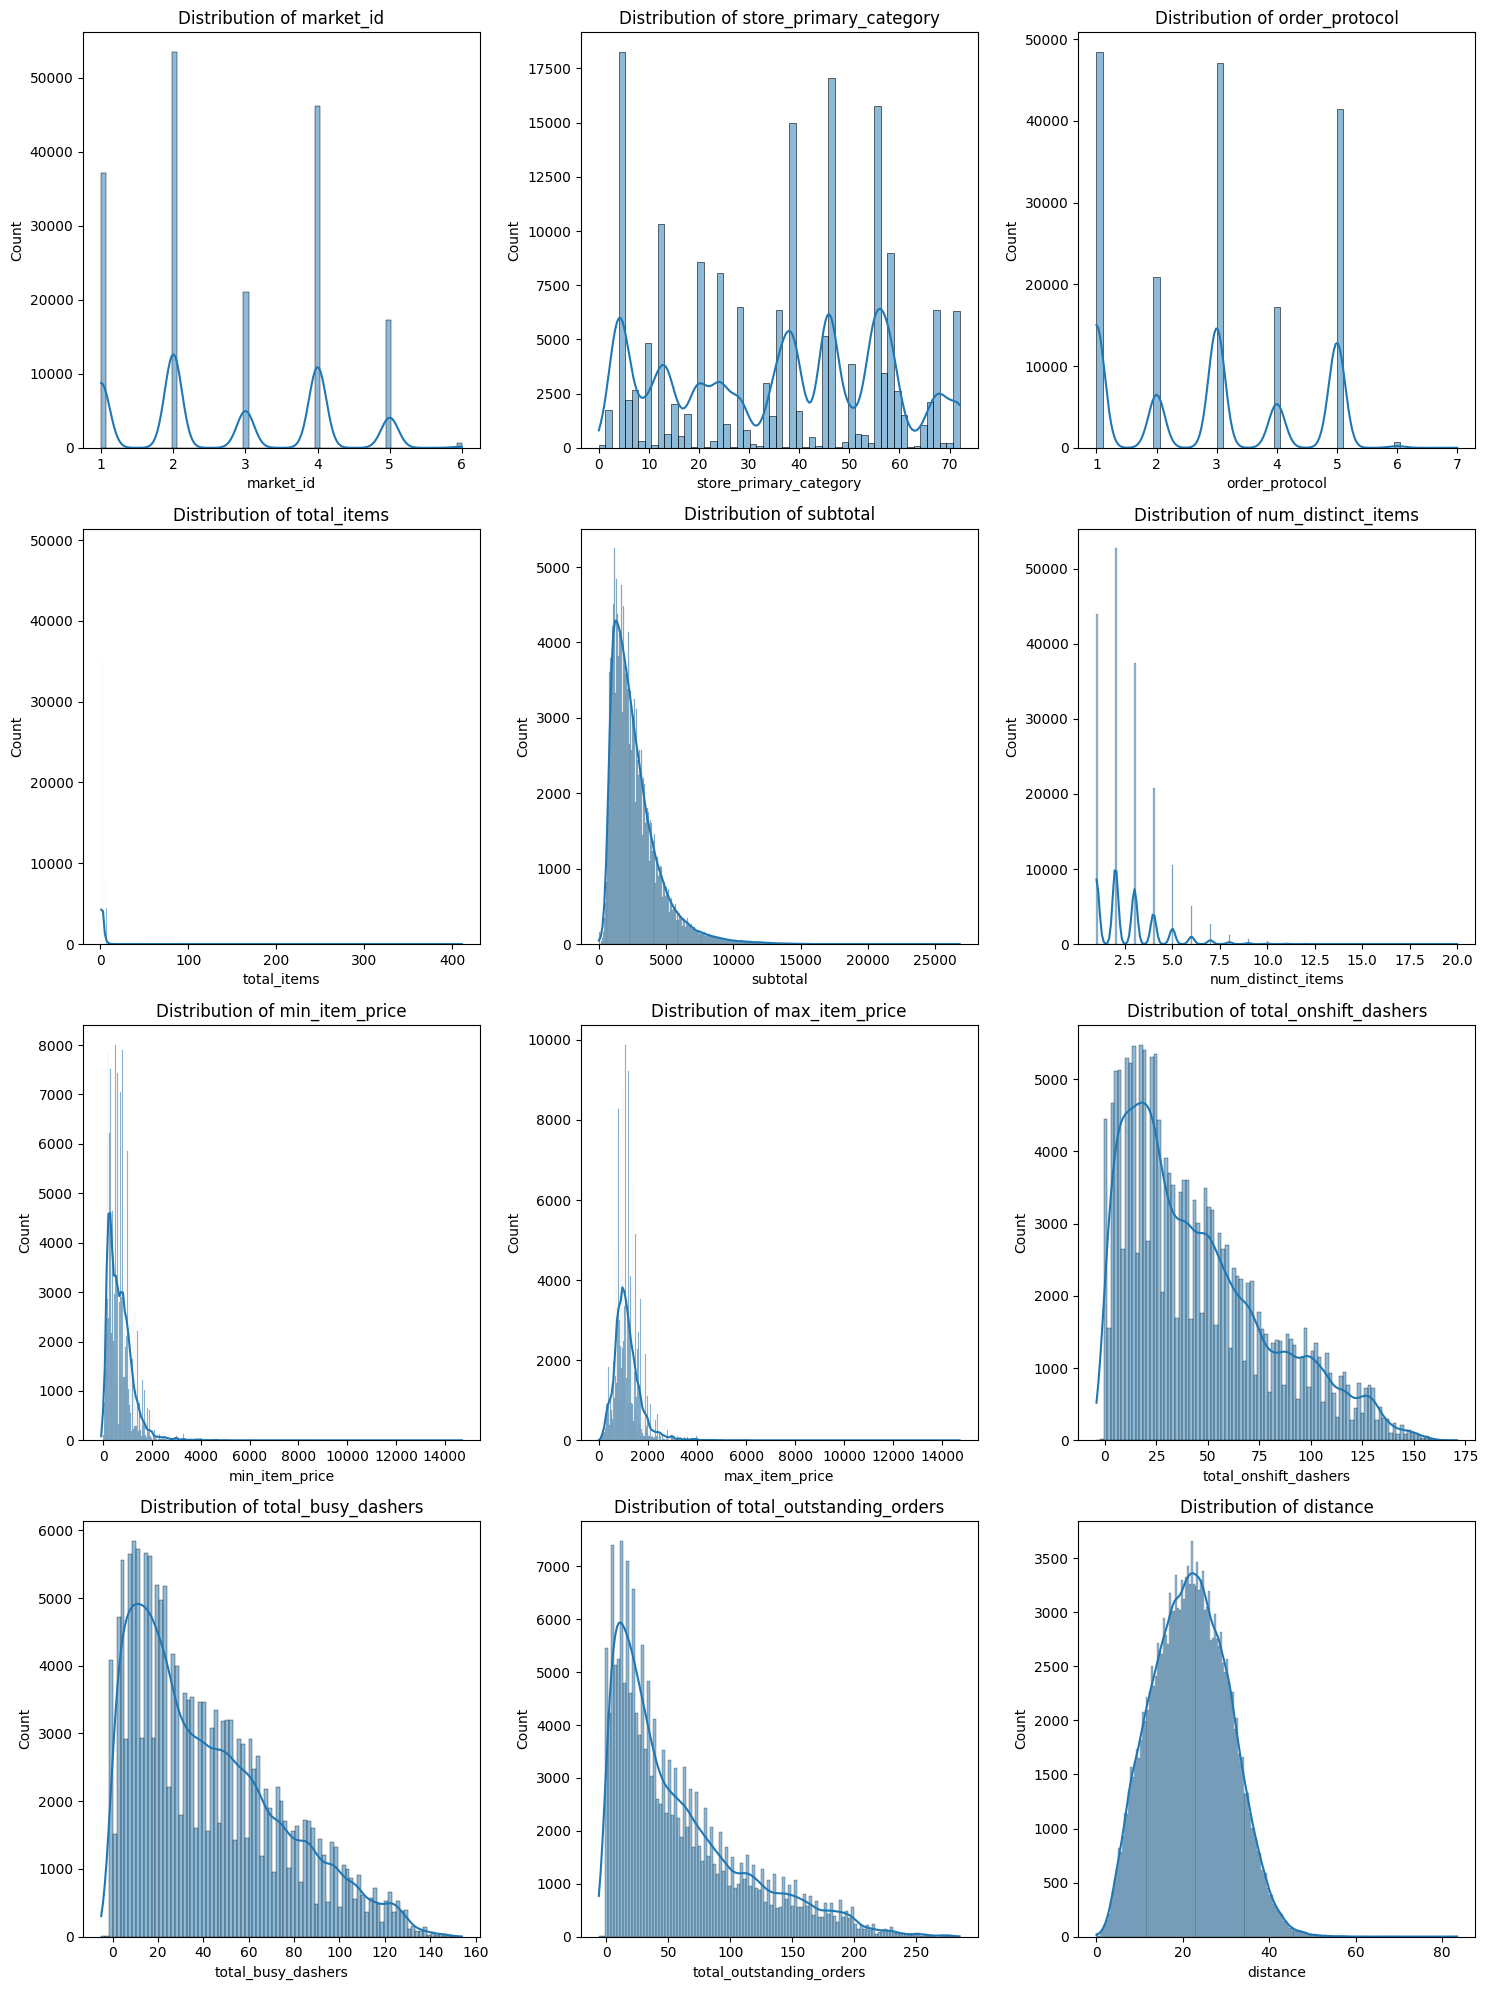

In [39]:
# Plot distributions for all numerical columns
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up the plot grid
n_cols = 3
n_rows = -(-len(numerical_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

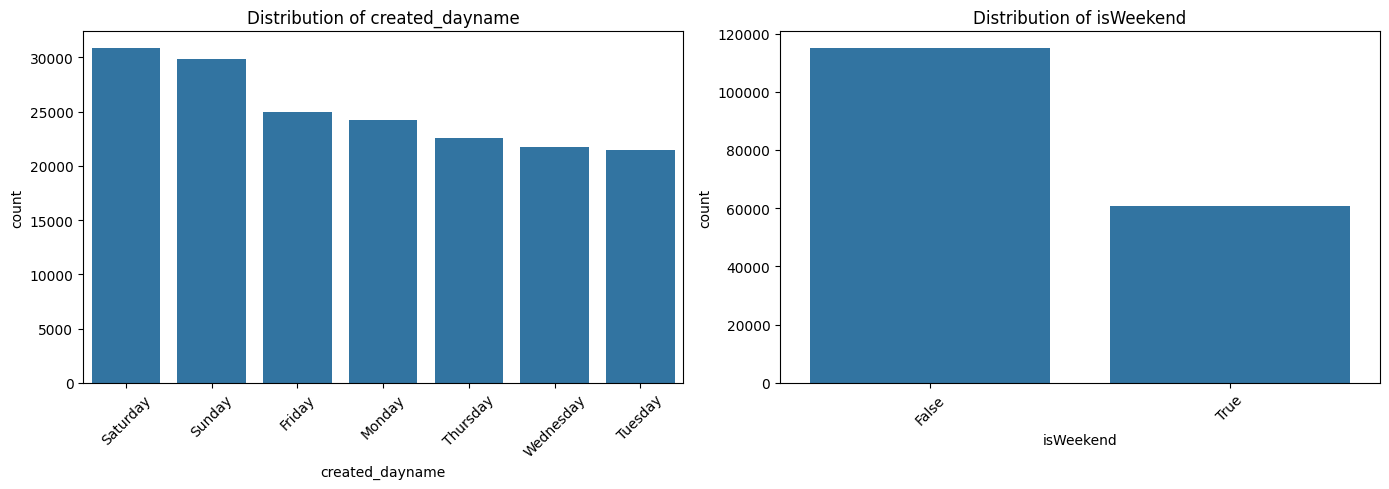

In [40]:
# Distribution of categorical columns
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Set up plot grid
n_cols = 2
n_rows = -(-len(categorical_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [41]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time', 'created_hour',
       'created_dayofweek', 'created_dayname', 'isWeekend'],
      dtype='object')

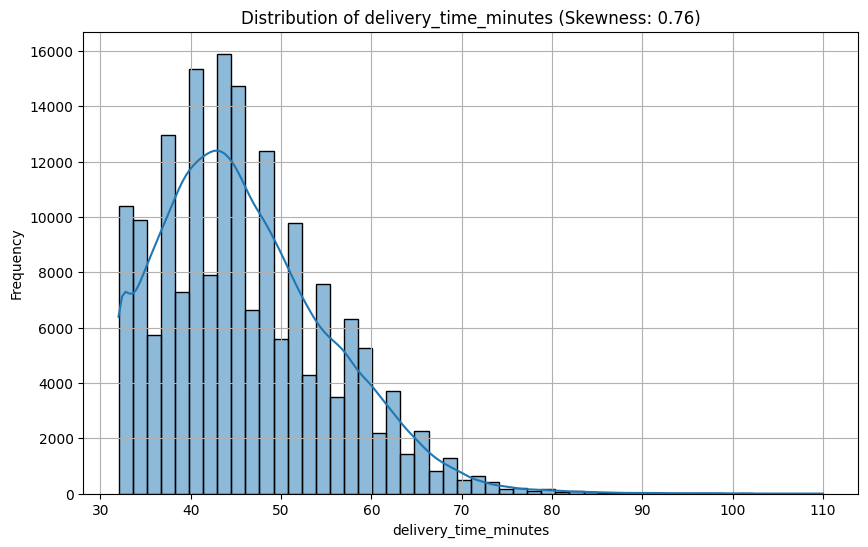

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

#df = pd.read_csv('/content/sample_data/porter_data_1.csv')
#df['delivery_time']=df['actual_delivery_time']-df['created_at']
df['delivery_time_minutes'] = df['delivery_time'].dt.total_seconds() / 60
# Choose your target variable
target = 'delivery_time_minutes'

# Calculate skewness
skewness = df[target].dropna().skew()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[target].dropna(), bins=50, kde=True)
plt.title(f'Distribution of {target} (Skewness: {skewness:.2f})')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

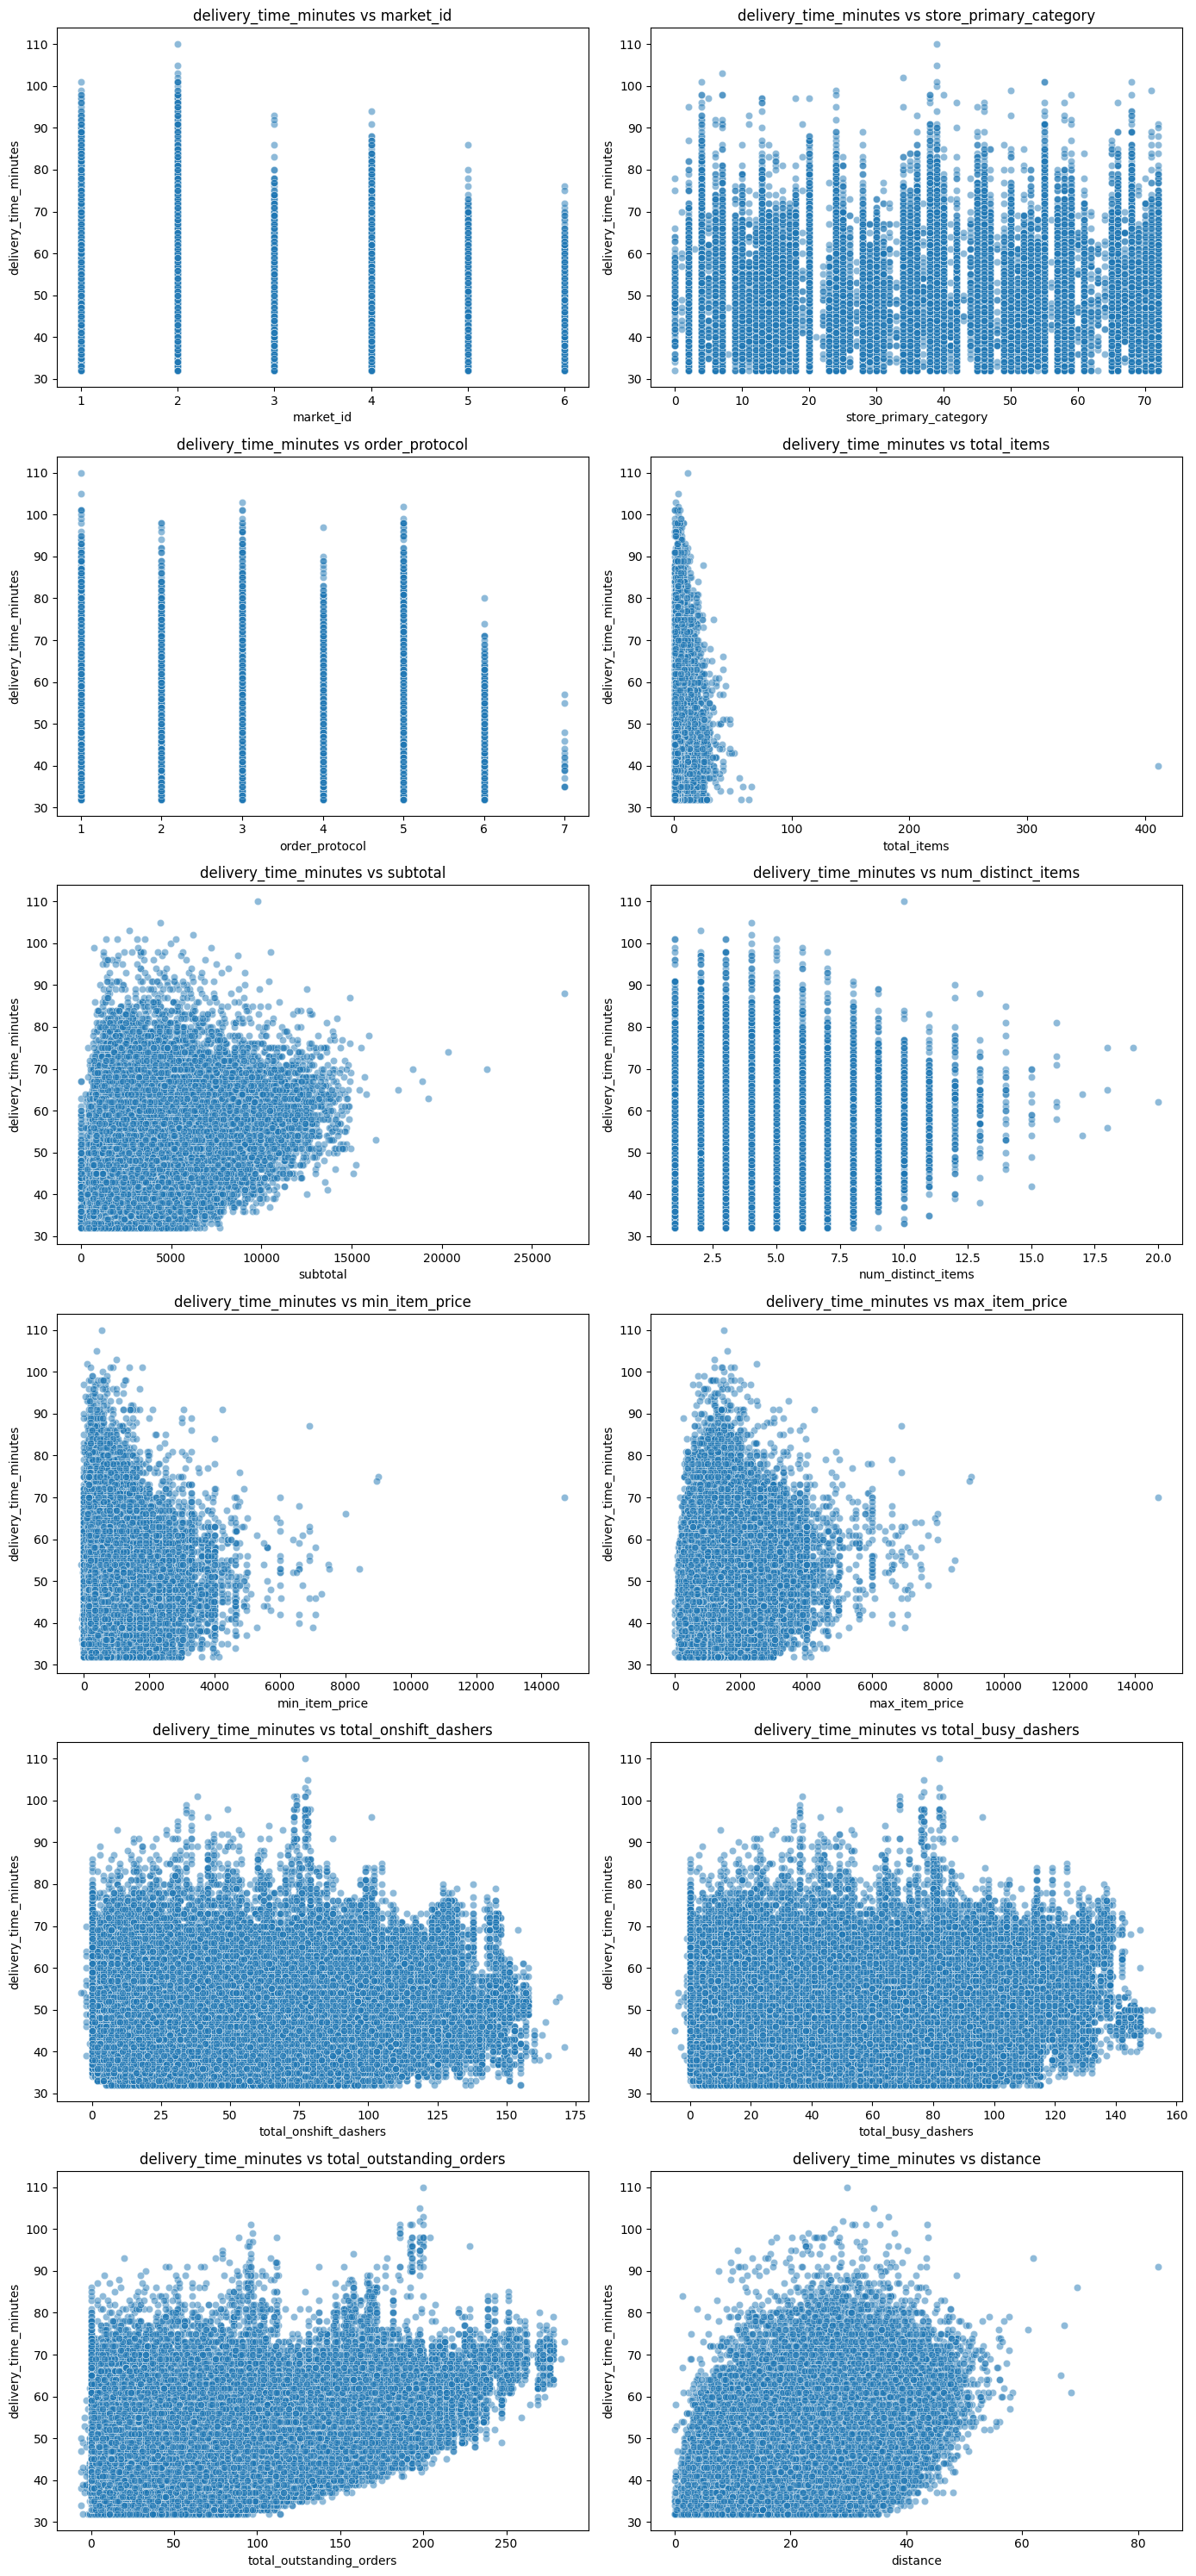

In [13]:
# Scatter plot to visualise the relationship between time_taken and other features
import matplotlib.pyplot as plt
import seaborn as sns

# Define target and features
target = 'delivery_time_minutes'
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target from feature list if present
if target in numerical_features:
    numerical_features.remove(target)

# Plot scatter plots
n_cols = 2
n_rows = -(-len(numerical_features) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.scatterplot(data=df, x=col, y=target, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{target} vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



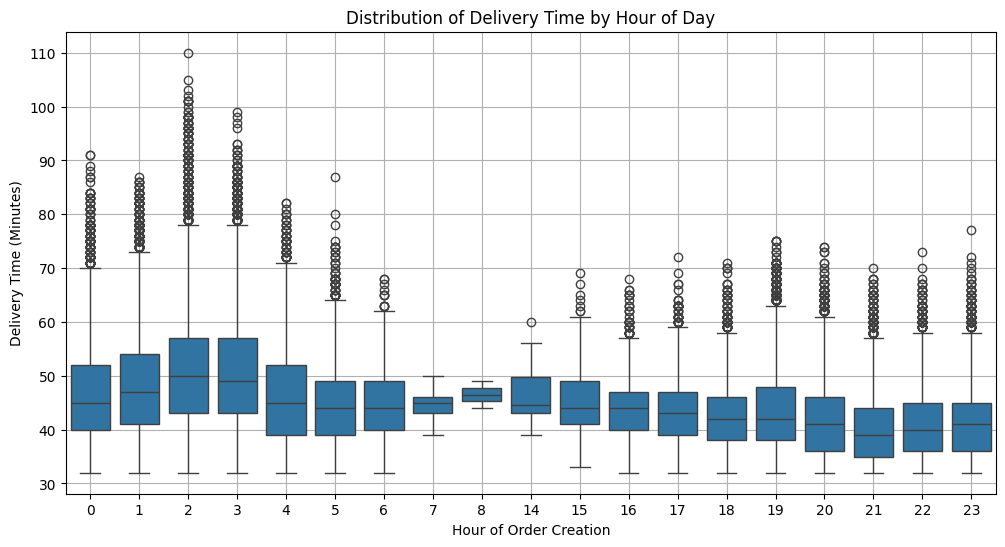

In [15]:
# Show the distribution of time_taken for different hours

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='created_hour', y='delivery_time_minutes', data=df)
plt.title('Distribution of Delivery Time by Hour of Day')
plt.xlabel('Hour of Order Creation')
plt.ylabel('Delivery Time (Minutes)')
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

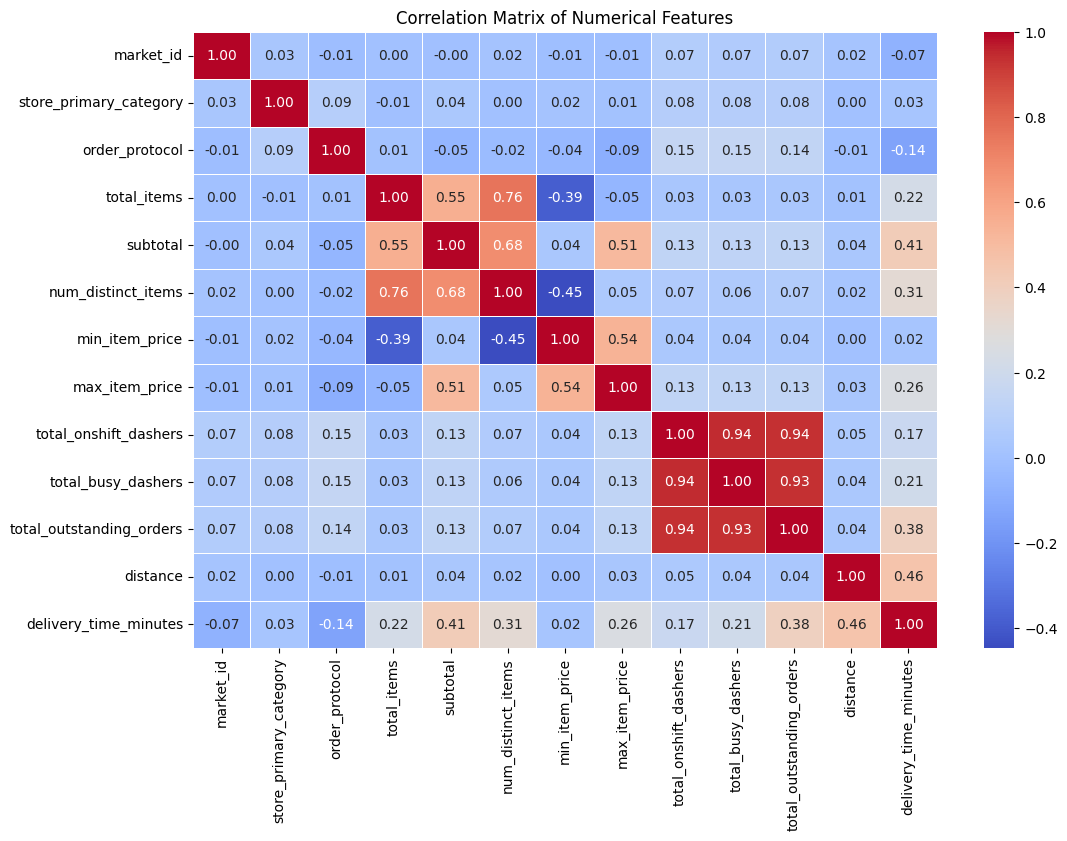

In [16]:
# Plot the heatmap of the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

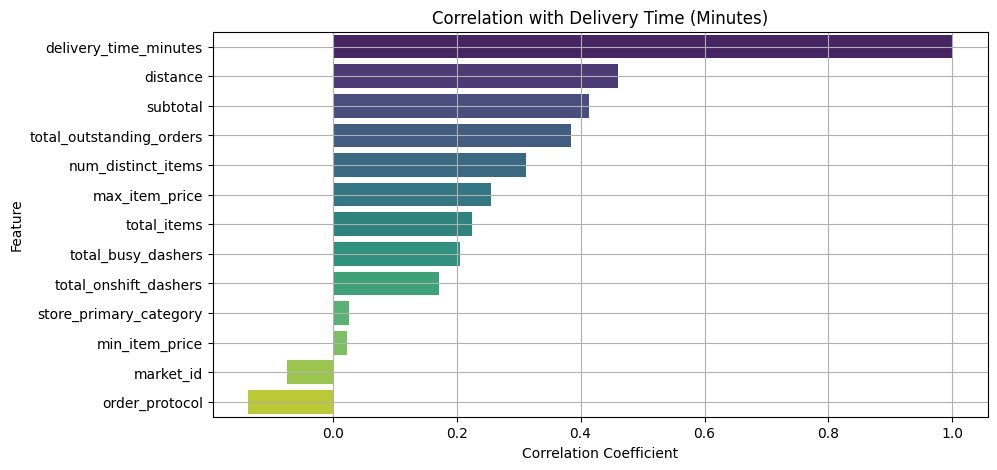

In [17]:
# Correlation of each feature with delivery_time_minutes
correlations = corr_matrix['delivery_time_minutes'].sort_values(ascending=False)

# Plot bar chart of top correlations
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation with Delivery Time (Minutes)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [47]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time', 'created_hour',
       'created_dayofweek', 'created_dayname', 'isWeekend'],
      dtype='object')

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/sample_data/porter_data_1.csv')
# 1. Define target and features
y = df['delivery_time']
X = df.drop(columns=[
    'delivery_time',
    'delivery_time',
    'actual_delivery_time',
    'created_at',
    'created_dayname'
])

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Combine X_train and y_train temporarily to compute correlations
train_with_target = X_train.copy()
train_with_target['delivery_time_minutes'] = y_train

# 4. Compute correlations
correlations = train_with_target.corr(numeric_only=True)['delivery_time_minutes'].drop('delivery_time_minutes')

# 5. Select weakly correlated features (absolute corr < 0.05)
weak_features = correlations[correlations.abs() < 0.05].index.tolist()

# 6. Drop 3–5 of the weakest features
features_to_drop = weak_features[:5]  # drop first 5 if available
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

# 7. Show dropped features
print("Dropped weakly correlated features:", features_to_drop)


KeyError: 'delivery_time'

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

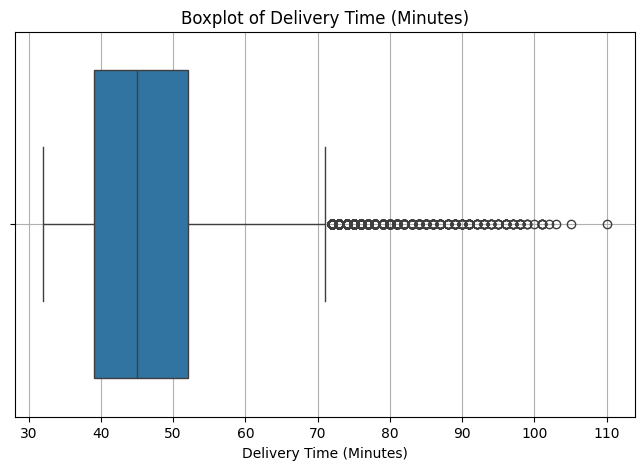

In [56]:
# Boxplot for time_taken

import matplotlib.pyplot as plt
import seaborn as sns

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

# Compute time taken in minutes
df['delivery_time'] = df['actual_delivery_time'] - df['created_at']
df['delivery_time_minutes'] = df['delivery_time'].dt.total_seconds() / 60

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['delivery_time_minutes'])
plt.title('Boxplot of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.grid(True)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [57]:
# Handle outliers

# Calculate IQR
Q1 = df['delivery_time_minutes'].quantile(0.25)
Q3 = df['delivery_time_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['delivery_time_minutes'] >= lower_bound) & (df['delivery_time_minutes'] <= upper_bound)]

print(f"Original size: {df.shape[0]}, After outlier removal: {df_no_outliers.shape[0]}")


Original size: 175777, After outlier removal: 174028


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [58]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Identify numerical columns (int or float)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (category or object)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the lists
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time_minutes']
Categorical columns: []


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

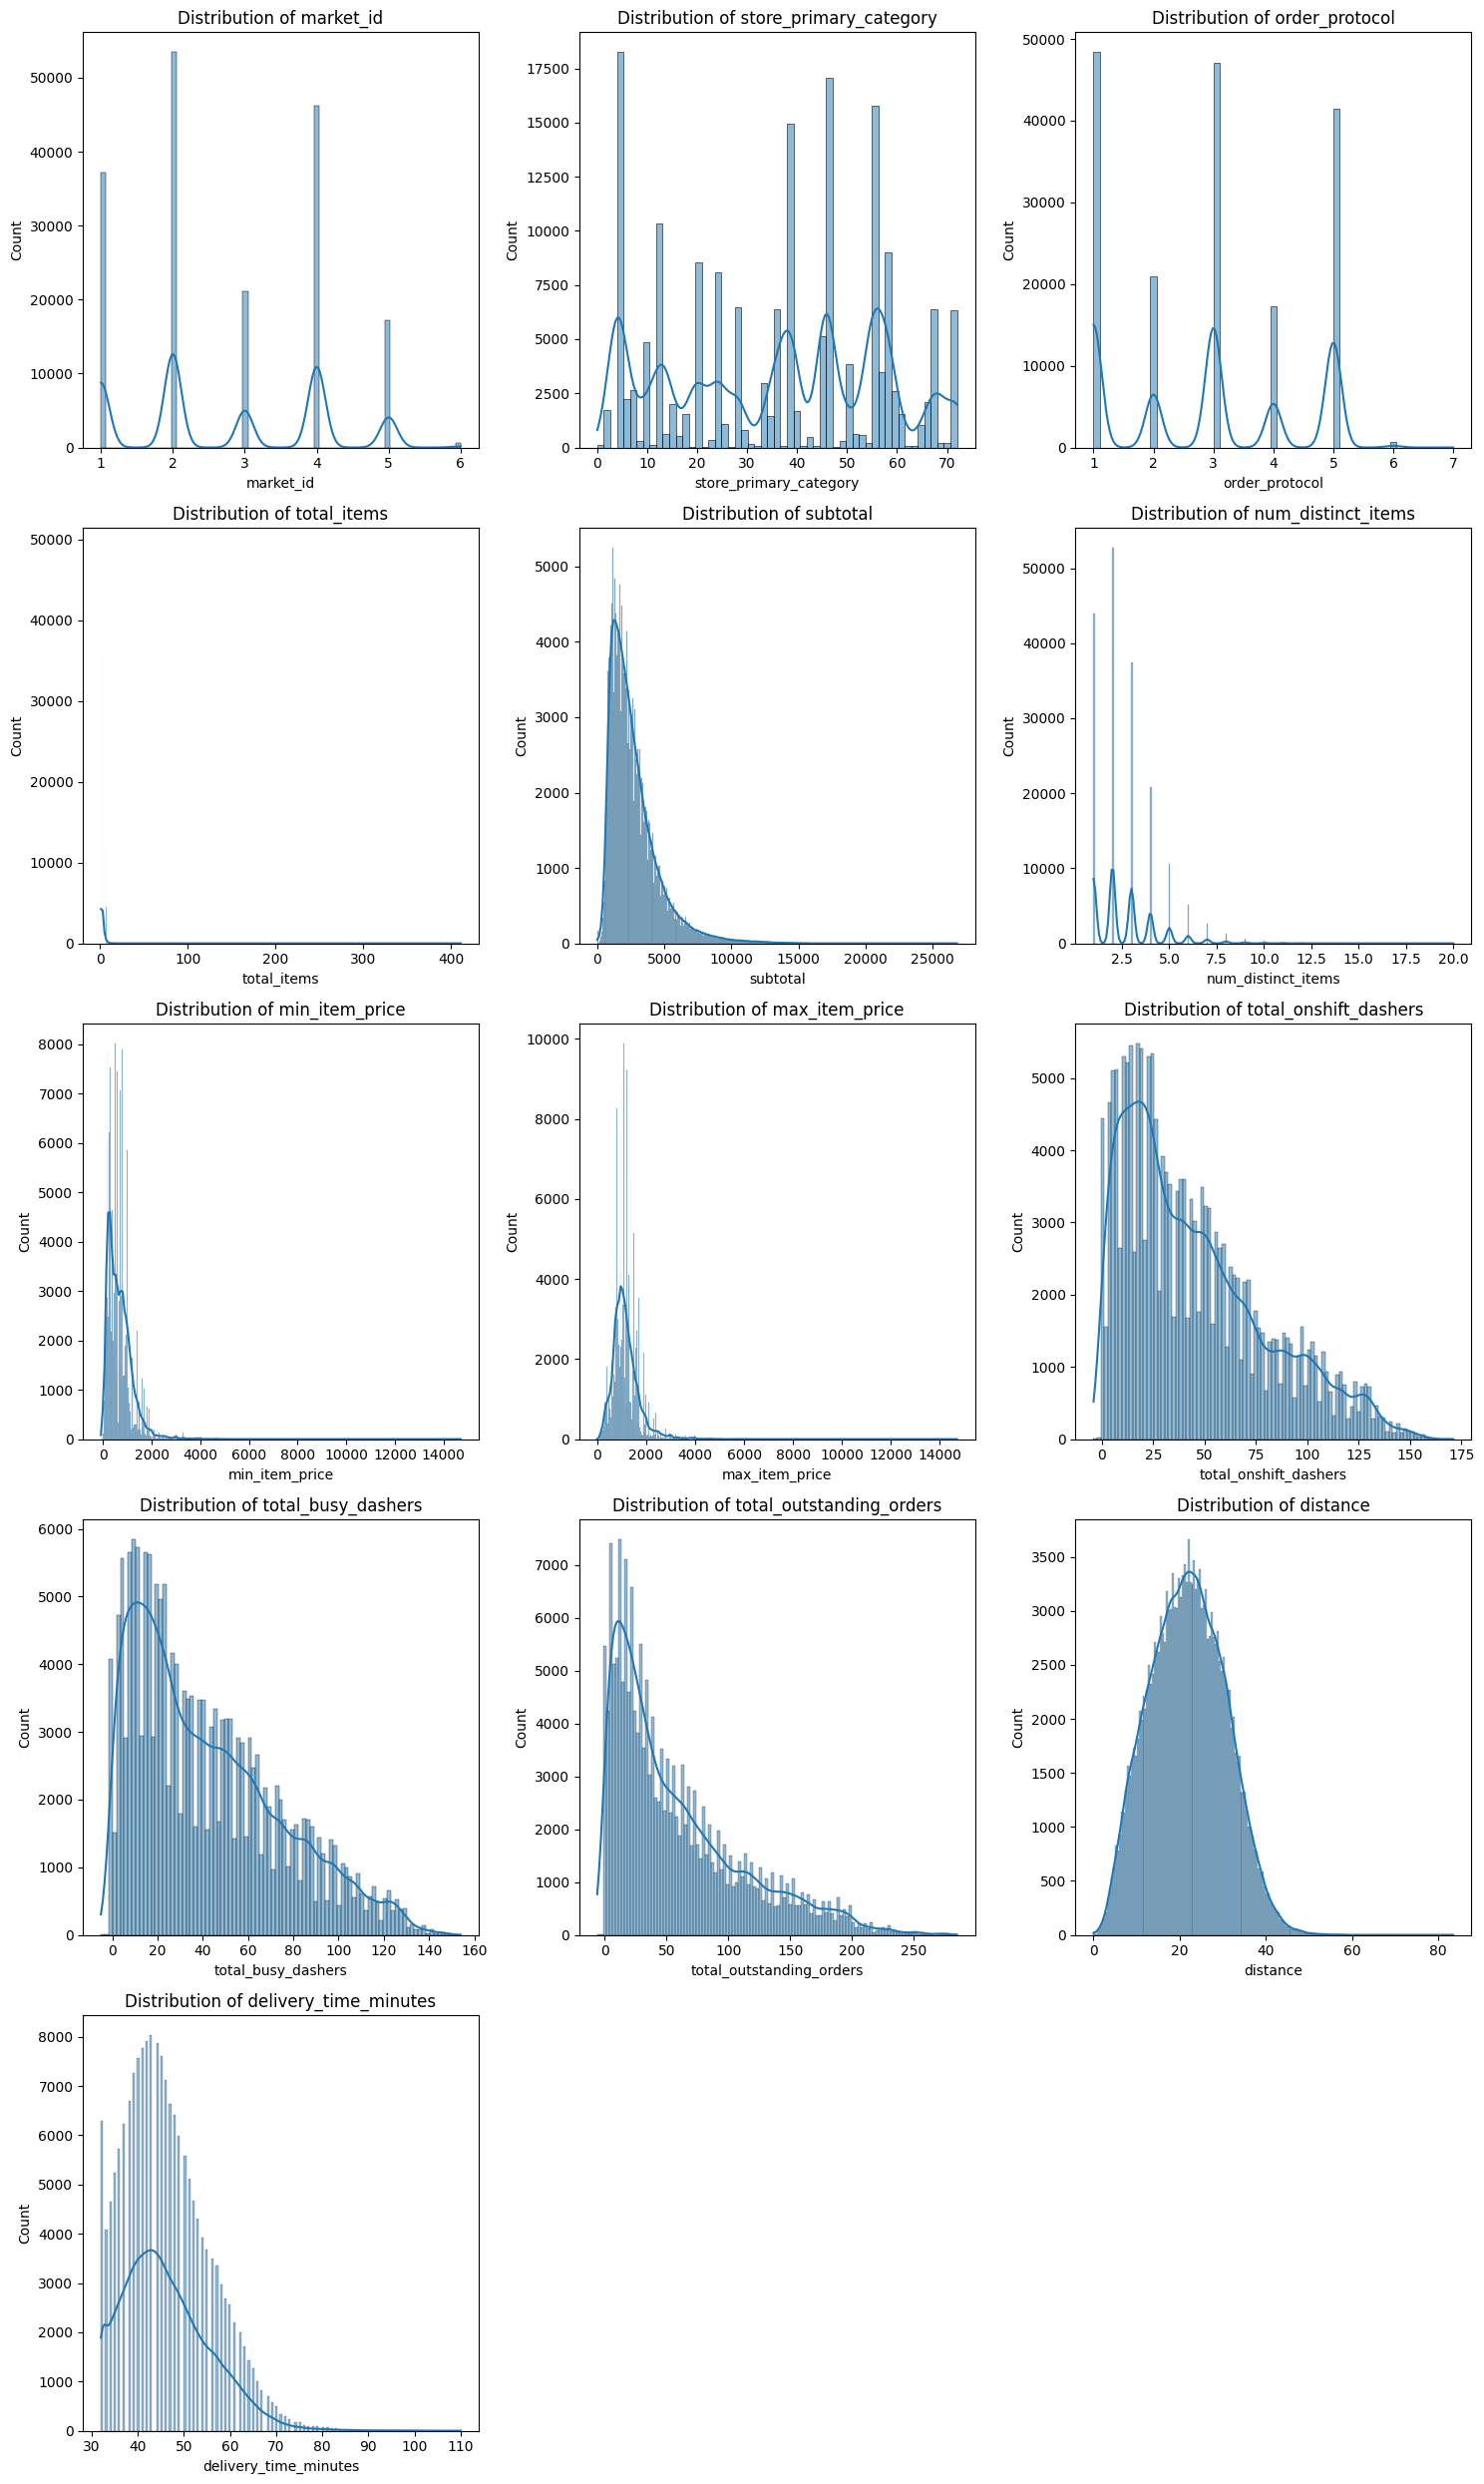

In [59]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up the plot grid
n_cols = 3
n_rows = -(-len(numerical_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



##### **4.1.2**
Check the distribution of categorical features

In [63]:
# Distribution of categorical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(categorical_cols) == 0:
    print("No categorical columns found.")
else:
    # Set up subplot grid
    n_cols = 2
    n_rows = -(-len(categorical_cols) // n_cols)  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
    axes = axes.flatten()

    # Plot each categorical column
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Remove any empty subplots
#for j in range(i + 1, len(axes)):
 #   fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


No categorical columns found.


<Figure size 640x480 with 0 Axes>

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

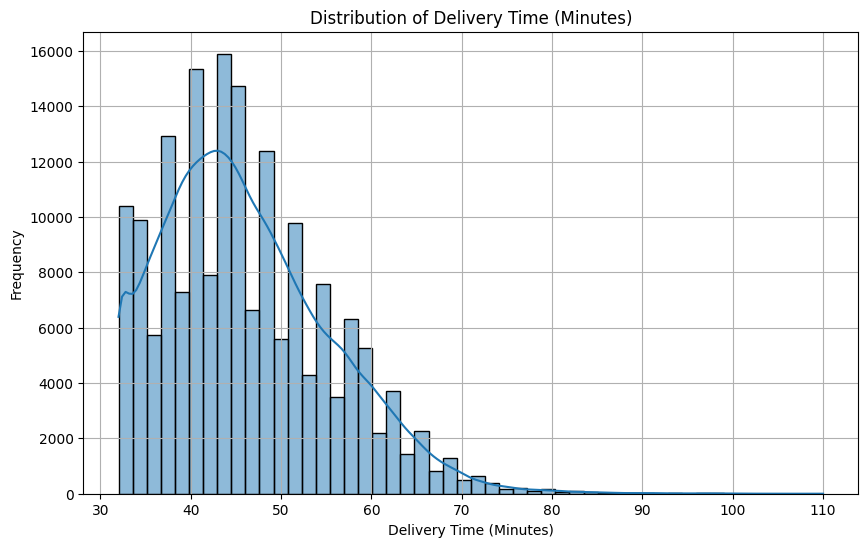

In [64]:
# Distribution of time_taken
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time_minutes'].dropna(), bins=50, kde=True)
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

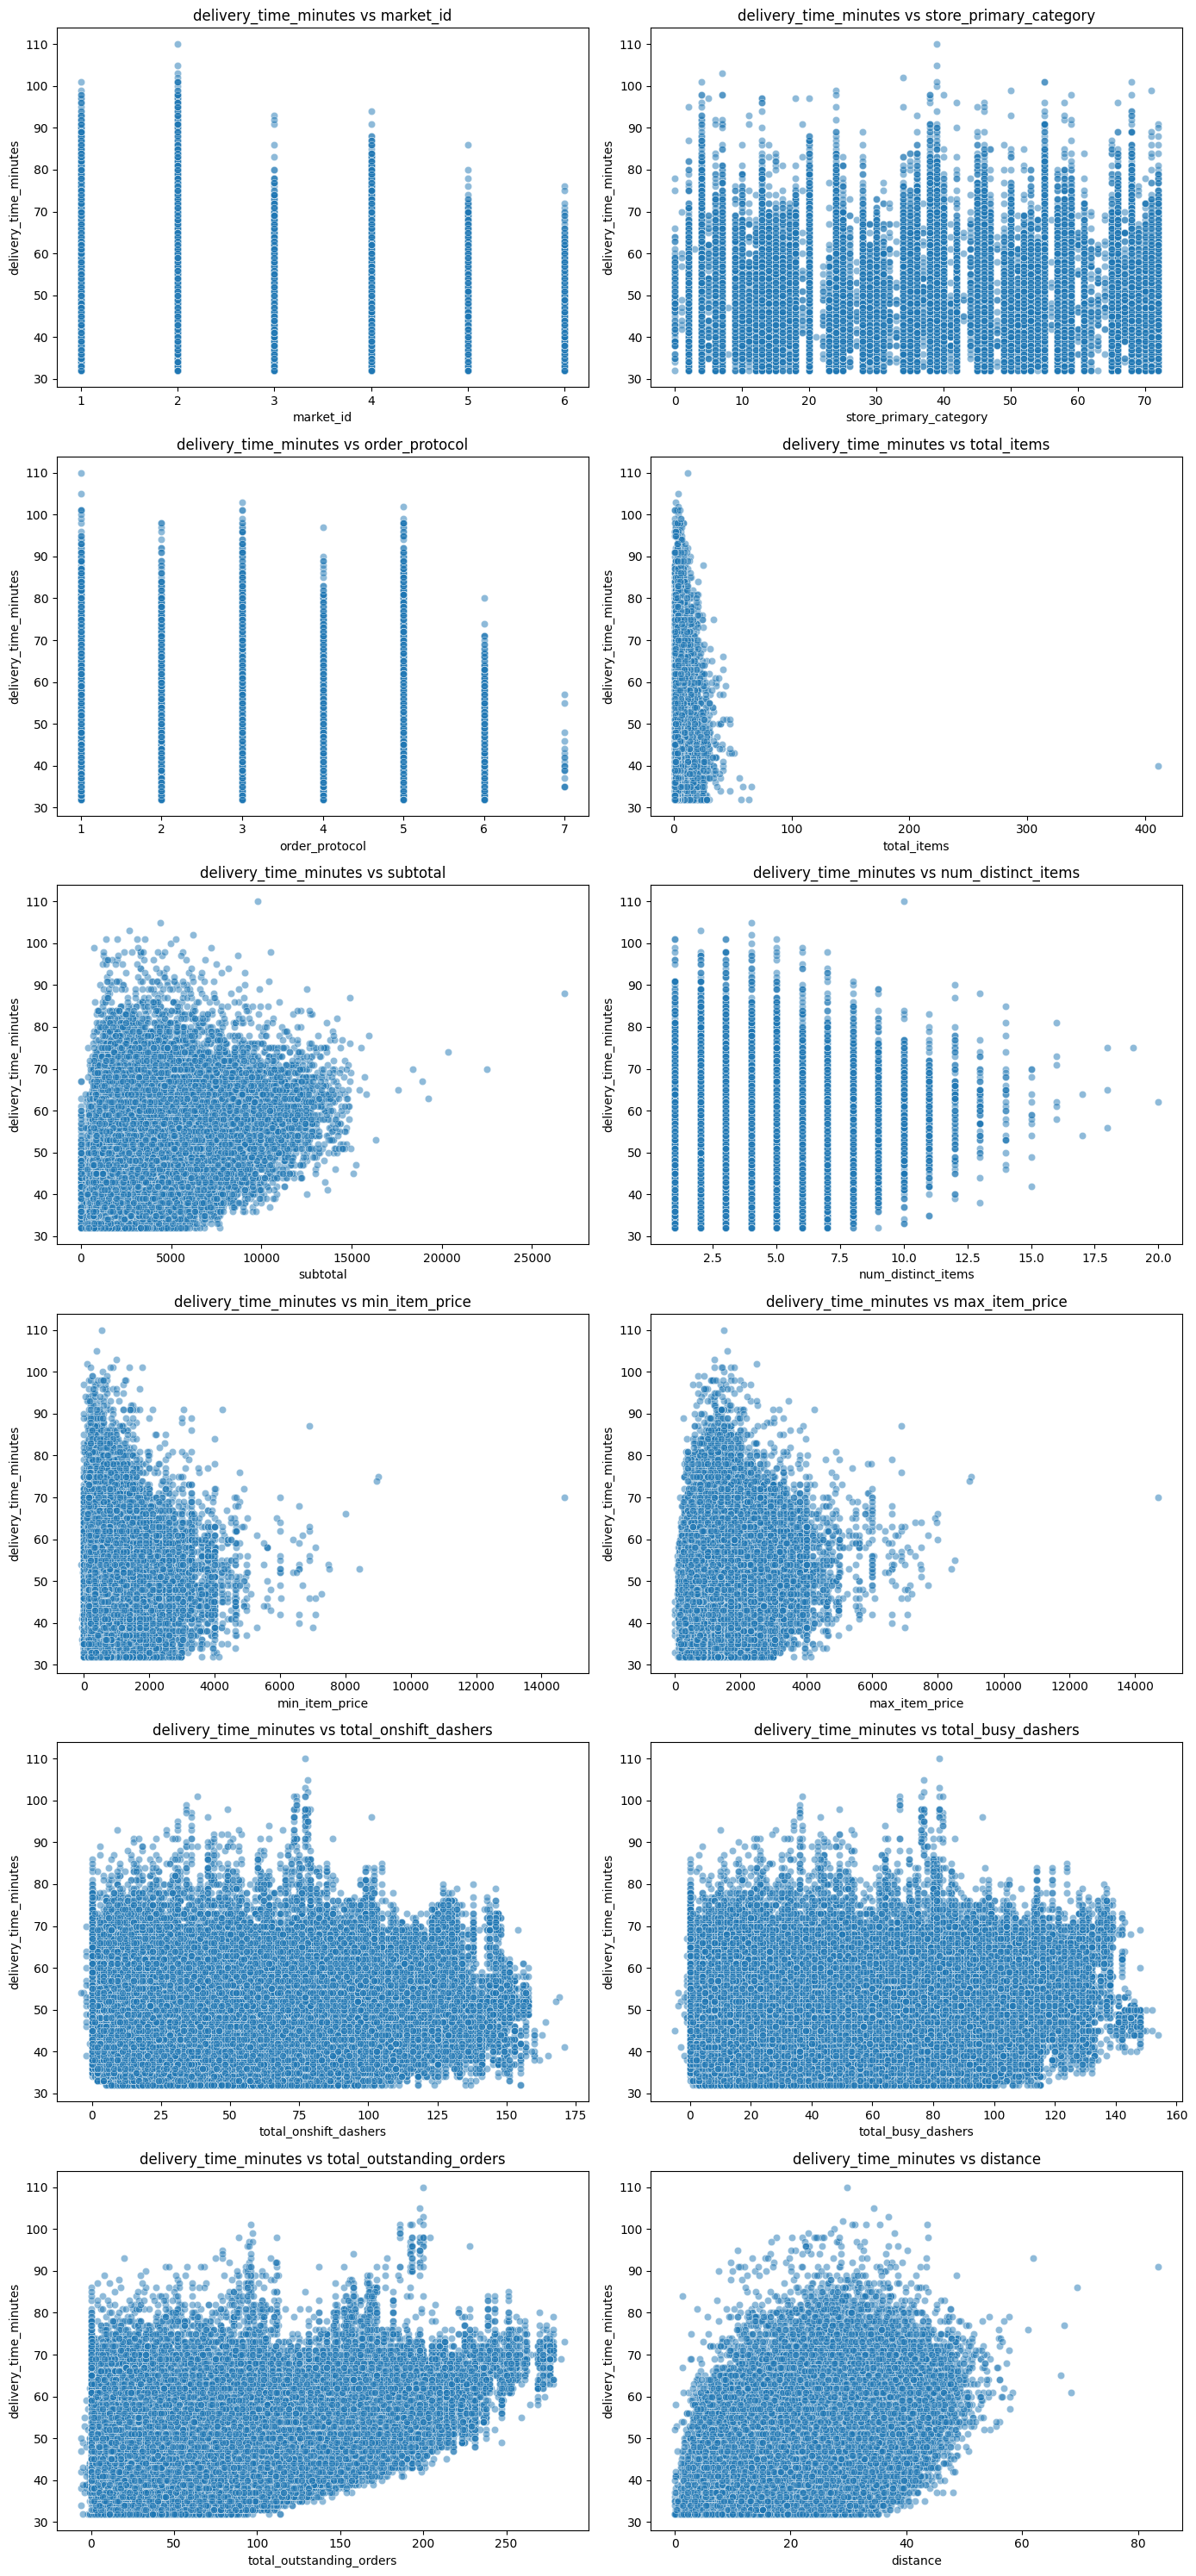

In [65]:
# Scatter plot to visualise the relationship between time_taken and other features
import matplotlib.pyplot as plt
import seaborn as sns

# Define target
target = 'delivery_time_minutes'

# Identify numerical features excluding the target
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target in numerical_features:
    numerical_features.remove(target)

# Set up plot grid
n_cols = 2
n_rows = -(-len(numerical_features) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

# Create scatter plots
for i, col in enumerate(numerical_features):
    sns.scatterplot(data=df, x=col, y=target, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{target} vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#### **4.3** Drop the columns with weak correlations with the target variable

In [69]:
# Drop the weakly correlated columns from training dataset

import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Define target and features
y = df['delivery_time_minutes']
X = df.drop(columns=[
    'delivery_time',               # timedelta
    'delivery_time_minutes',       # target
    'actual_delivery_time',        # raw timestamp
    'created_at',                  # raw timestamp
    ])

# Step 2: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 3: Combine training features and target for correlation
train_with_target = X_train.copy()
train_with_target['delivery_time_minutes'] = y_train

# Step 4: Compute correlation with the target
correlations = train_with_target.corr(numeric_only=True)['delivery_time_minutes'].drop('delivery_time_minutes')

# Step 1: Identify weakly correlated features as before
weak_features = correlations[correlations.abs() < 0.05].index.tolist()

# Step 2: Drop only those that are present in X_train/X_test
features_to_drop = [col for col in weak_features if col in X_train.columns]

# Step 3: Safely drop
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

# Step 4: Output what was actually dropped
print("Dropped weakly correlated features:", features_to_drop)


Dropped weakly correlated features: ['store_primary_category', 'min_item_price']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [70]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [72]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import StandardScaler

# 1. Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. Initialize the scaler
scaler = StandardScaler()

# 3. Fit on training data and transform both train and test sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(X_test)
print(X_test)

        market_id  order_protocol  total_items  subtotal  num_distinct_items  \
50609   -1.311372       -1.264500     0.287056 -0.055216            0.813197   
49181    0.941248        0.057705    -0.075210  0.263422           -0.415476   
4526     1.692121       -1.264500    -0.799744 -0.817437           -1.029812   
131      1.692121        0.718808     0.649323 -0.604103            0.813197   
57096    0.190374        1.379910     1.011590  0.536228            0.198861   
...           ...             ...          ...       ...                 ...   
4506     0.190374       -1.264500     0.287056 -0.762330           -0.415476   
73660    1.692121        1.379910    -0.799744  0.129747           -1.029812   
127883  -0.560499        0.057705    -0.437477 -0.287647           -0.415476   
137254  -0.560499        1.379910     0.649323 -0.156700            0.813197   
139332   0.190374       -1.264500    -0.437477  0.093191           -0.415476   

        max_item_price  total_onshift_d

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [73]:
# Create/Initialise the model
import statsmodels.api as sm

# Add constant (intercept term)
X_train_sm = sm.add_constant(X_train)

# Fit Ordinary Least Squares (OLS) model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Summary of the model
print(model_sm.summary())


                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                 6.174e+04
Date:                   Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                           08:36:13   Log-Likelihood:            -3.3881e+05
No. Observations:                 123043   AIC:                         6.777e+05
Df Residuals:                     123032   BIC:                         6.778e+05
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [74]:
# Train the model using the training data
from sklearn.linear_model import LinearRegression

# Initialize the model
model_sk = LinearRegression()

# Train (fit) the model on the training data
model_sk.fit(X_train, y_train)

# You can now use model_sk.predict(X_test) to make predictions
print("Model training complete.")



Model training complete.


In [75]:
import statsmodels.api as sm

# Add constant for intercept term
X_train_sm = sm.add_constant(X_train)

# Fit the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# View summary
print(model_sm.summary())


                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                 6.174e+04
Date:                   Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                           08:38:09   Log-Likelihood:            -3.3881e+05
No. Observations:                 123043   AIC:                         6.777e+05
Df Residuals:                     123032   BIC:                         6.778e+05
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [77]:
# Make predictions
# with Scikit-learn-
# Make predictions on the test set
y_pred = model_sk.predict(X_test)

# Optionally view predictions
print("Sample predictions:", y_pred[:5])


Sample predictions: [50.27009139 66.38457148 39.60044593 44.95257155 40.66065793]


In [78]:
# Find results for evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are already defined
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 2.89
Mean Squared Error (MSE): 14.46
Root Mean Squared Error (RMSE): 3.80
R-squared (R²): 0.8344


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [79]:
# Loop through the number of features and test the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Compute correlations with target
correlations = df.corr(numeric_only=True)['delivery_time_minutes'].drop('delivery_time_minutes')
ranked_features = correlations.abs().sort_values(ascending=False).index.tolist()

# 2. Set up loop to test model performance with increasing number of features
results = []

for n in range(1, len(ranked_features) + 1):
    selected_features = ranked_features[:n]

    # Split data
    X = df[selected_features]
    y = df['delivery_time_minutes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append((n, rmse, r2))

# 3. Display results
for n, rmse, r2 in results:
    print(f"{n:2d} features: RMSE = {rmse:.2f}, R² = {r2:.4f}")


 1 features: RMSE = 8.30, R² = 0.2121
 2 features: RMSE = 7.42, R² = 0.3697
 3 features: RMSE = 6.80, R² = 0.4709
 4 features: RMSE = 6.78, R² = 0.4731
 5 features: RMSE = 6.76, R² = 0.4764
 6 features: RMSE = 6.76, R² = 0.4764
 7 features: RMSE = 5.38, R² = 0.6680
 8 features: RMSE = 4.05, R² = 0.8125
 9 features: RMSE = 3.90, R² = 0.8259
10 features: RMSE = 3.80, R² = 0.8344
11 features: RMSE = 3.80, R² = 0.8346
12 features: RMSE = 3.80, R² = 0.8347


In [80]:
# Build the final model with selected number of features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Rank features by absolute correlation with target
correlations = df.corr(numeric_only=True)['delivery_time_minutes'].drop('delivery_time_minutes')
top_features = correlations.abs().sort_values(ascending=False).index.tolist()

# Step 2: Choose top N features
N = 5  # You can change this to the desired number
selected_features = top_features[:N]

print("Selected features for final model:", selected_features)

# Step 3: Split the data
X = df[selected_features]
y = df['delivery_time_minutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build and train the final model
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = final_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Step 6: Output evaluation
print(f"\nFinal Model Evaluation with {N} features:")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")



Selected features for final model: ['distance', 'subtotal', 'total_outstanding_orders', 'num_distinct_items', 'max_item_price']

Final Model Evaluation with 5 features:
RMSE: 6.76
R²:   0.4764


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

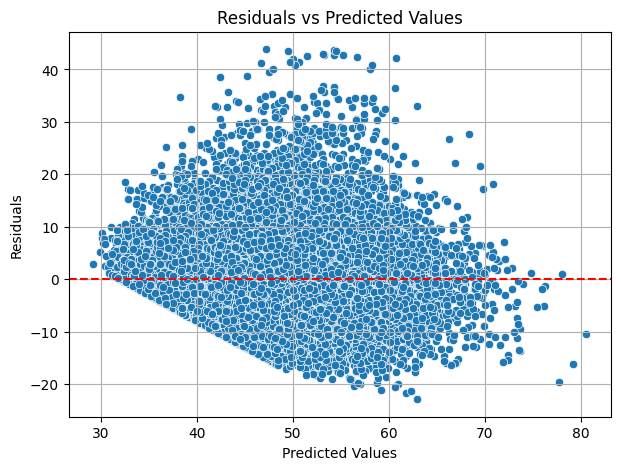

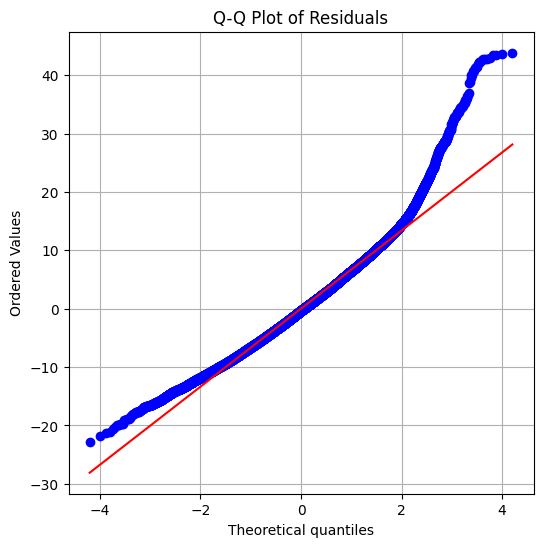

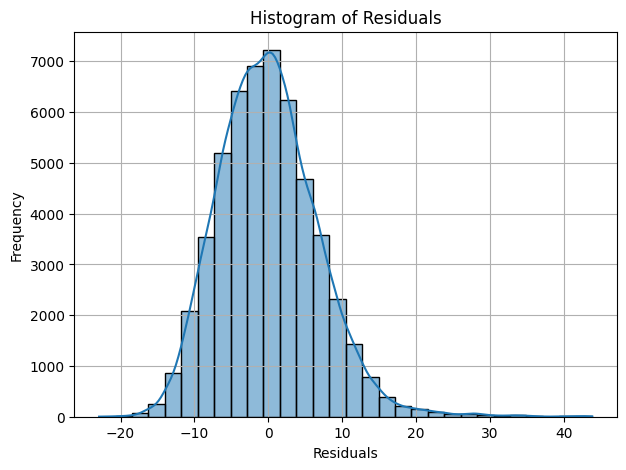

In [81]:
# import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Step 1: Calculate residuals
residuals = y_test - y_pred

# === 1. Residuals vs Predicted Values Plot ===
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

# === 2. Q-Q Plot for Residuals ===
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

# === 3. Histogram of Residuals ===
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [82]:
#import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Select top N features from earlier (same as final model)
top_features = selected_features  # from earlier step with top N features

# Step 2: Define X and y
X = df[top_features]
y = df['delivery_time_minutes']

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Fit model on unscaled data
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)
coeff_unscaled = model_unscaled.coef_

# Step 5: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Fit model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
coeff_scaled = model_scaled.coef_

# Step 7: Compare coefficients
coef_df = pd.DataFrame({
    'Feature': top_features,
    'Unscaled Coeff': coeff_unscaled,
    'Scaled Coeff': coeff_scaled
})
coef_df['Abs(Scaled Coeff)'] = coef_df['Scaled Coeff'].abs()
coef_df = coef_df.sort_values(by='Abs(Scaled Coeff)', ascending=False)

# Display results
print(coef_df[['Feature', 'Unscaled Coeff', 'Scaled Coeff']])


                    Feature  Unscaled Coeff  Scaled Coeff
0                  distance        0.461863      4.037336
2  total_outstanding_orders        0.056519      2.982317
1                  subtotal        0.001235      2.263455
3        num_distinct_items        0.642831      1.046384
4            max_item_price        0.001144      0.640695


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [85]:
# Analyze the effect of a unit change in a feature, say 'total_items'
# 1. Ensure 'total_items' is in the training set
print("Model features:", X_train.columns.tolist())
if 'num_distinct_items' not in X_train.columns:
    raise ValueError("'num_distinct_items' must be included in the selected features.")

# 2. Get the coefficient from the model trained on unscaled data
feature_name = 'num_distinct_items'
coef_index = X_train.columns.get_loc(feature_name)
impact = model_unscaled.coef_[coef_index]

# 3. Display the result
print(f"A 1-unit increase in '{feature_name}' increases predicted delivery time by approximately {impact:.2f} minutes.")


Model features: ['distance', 'subtotal', 'total_outstanding_orders', 'num_distinct_items', 'max_item_price']
A 1-unit increase in 'num_distinct_items' increases predicted delivery time by approximately 0.64 minutes.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Yes, the dataset contains categorical variables such as `store_primary_category`, `order_protocol`, and possibly engineered ones like `isWeekend`.
- From the boxplots:
  - `store_primary_category` shows clear variation in delivery times between categories (e.g., fast food vs grocery).
  - `order_protocol` may suggest different operational modes (e.g., scheduled vs instant) which affect time.
  - `isWeekend` shows slightly higher median delivery times, indicating possible delays on weekends.
  
Hence, categorical features likely influence delivery time and should be included in modeling, possibly after encoding.

---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2` means that 20% of the dataset is reserved for the test set, and the remaining 80% is used for training the model.




---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

heat.png**Answer:**
>

From the correlation heatmap and numerical computation, the feature with the highest correlation to the target variable `delivery_time_minutes` is:

- `distance`, with a correlation of approximately 0.46.

This makes intuitive sense — greater distances generally lead to longer delivery times.

---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
I used below two techniques
>Boxplots:

Boxplots were used to visually identify extreme values in numerical columns, especially the target variable delivery_time_minutes.

Points beyond 1.5*IQR from Q1 and Q3 are considered outliers.

Z-Score (Standard Deviation) or IQR Method:

flagged values with a z-score above 3 or below -3 (or values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR).



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>The top 3 features significantly affecting delivery time are:

1. distance — The most impactful feature: longer distances lead to increased delivery time.
2. total_items — More items in the order generally increase delivery duration.
3. created_hour — Time of day affects delivery speed, likely due to traffic or order density.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features. It assumes a linear relationship between the independent variables (features) and the dependent variable (target).

Types of Linear Regression -

1)Simple Linear Regression — one independent variable
2)Multiple Linear Regression — more than one independent variable

It is idea for -

Predictive modeling
Feature impact interpretation
Forecasting and trend analysis

1)Predictive modeling
2)Feature impact interpretation
3)Forecasting and trend analysis





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Simple linear regression is a statistical method used to model the relationship between a single independent variable and a dependent variable by fitting a straight line to the observed data. It assumes that changes in the dependent variable can be explained by changes in one predictor variable. Whereas, multiple linear regression extends this concept by modeling the relationship between two or more independent variables and a single dependent variable. This allows for a more comprehensive analysis where multiple factors simultaneously influence the outcome. While simple linear regression is suitable for understanding the impact of one factor, multiple linear regression is more powerful in real-world scenarios where outcomes are typically affected by several interacting variables. Both methods aim to estimate coefficients that best fit the data, but multiple linear regression provides a broader and often more accurate predictive framework.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>cost function plays a crucial role in measuring how well the model's predictions match the actual values. It depicts the difference between the prdicted output and expected output




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model learns the underlying patterns in the training data and the noise and outliers. As a result, it performs exceptionally well on the training set but poorly on new, unseen data.

Underfitting happens when a model is too simple to capture the underlying patterns in the data. It performs poorly on both the training and test sets because it hasn’t learned enough from the data. This can occur when the model is too basic, important features are missing, or the model isn’t trained long enough.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residuals are the differences between the actual and predicted values:

Residual = actual value - predicted value

they help in assessing the validity of model assumptions and the overall fit of the model.
